In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
# Install NLTK and download necessary resources
!pip install nltk
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install keras
!pip install tensorflow
!pip install --upgrade tensorflow

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import re
import nltk
nltk.download('punkt')
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import numpy as np
nltk.download('omw-1.4')
from keras.utils import plot_model

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


[nltk_data] Downloading package punkt to /Users/Tiziana/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Tiziana/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/Tiziana/nltk_data...


True

# LSTM for classification


In [ ]:
train = pd.read_csv('/Users/Tiziana/Desktop/Facultad/team 4/data/data/train.csv', header=None)
test = pd.read_csv('/Users/Tiziana/Desktop/Facultad/team 4/data/data/test.csv',header=None)

In [ ]:
train = train.rename(columns={train.columns[0]: 'rate', train.columns[1]: 'text'})
test = test.rename(columns={train.columns[0]: 'rate', test.columns[1]: 'text'})

In [ ]:
rate_counts = test[0].value_counts()
rate_counts

0
1    10000
3    10000
2    10000
4    10000
5    10000
Name: count, dtype: int64

In [ ]:
max_features = 2000
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

stop_words = set(stopwords.words('english')) # Set of English stop words

def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.strip() != '']
    return filtered_tokens

In [ ]:
# Preprocess train data
train['text'] = train['text'].apply(lambda x: x.lower())
train['text'] = train['text'].apply(remove_special_characters)
train['text'] = train['text'].apply(nltk.word_tokenize)  # Tokenize before removing stopwords
train['text'] = train['text'].apply(remove_stopwords)
train['text'] = train['text'].apply(lemmatize_tokens)

In [ ]:
# Preprocess test data
test['text'] = test['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(remove_special_characters)
test['text'] = test['text'].apply(nltk.word_tokenize)  # Tokenize before removing stopwords
test['text'] = test['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(lemmatize_tokens)

In [ ]:
# Tokenize and pad sequences for train data
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train['text'].apply(lambda x: ' '.join(x)).values)  # Join tokens into sentences
X_train = tokenizer.texts_to_sequences(train['text'].apply(lambda x: ' '.join(x)).values)
X_train = pad_sequences(X_train)

In [ ]:
# Tokenize and pad sequences for test data
X_test = tokenizer.texts_to_sequences(test['text'].apply(lambda x: ' '.join(x)).values)
X_test = pad_sequences(X_test)

In [ ]:
Y_train = pd.get_dummies(train['rate']).values
Y_test = pd.get_dummies(test[0]).values

In [ ]:
embed_dim = 50
lstm_out = 200
max_features = 2000
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.build(input_shape=(None, X_train.shape[1]))
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 441, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 200)            │       200,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,805 (1.15 MB)

 Trainable params: 301,805 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
batch_size = 256
model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2)

Epoch 1/3
2540/2540 - 4382s - 2s/step - accuracy: 0.5559 - loss: 1.0185
Epoch 2/3
2540/2540 - 4385s - 2s/step - accuracy: 0.5927 - loss: 0.9382
Epoch 3/3
2540/2540 - 4221s - 2s/step - accuracy: 0.6095 - loss: 0.8988


In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
#since tf 2.6 and later
predictions = model.predict(X_test)
predictions

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step


array([[8.9981723e-01, 6.2108882e-02, 1.4735548e-02, 6.4053852e-03,
        1.6932935e-02],
       [9.6845102e-01, 2.4137300e-02, 4.3208869e-03, 8.6351711e-04,
        2.2273839e-03],
       [8.6152744e-01, 1.2675580e-01, 1.0093522e-02, 1.0890545e-03,
        5.3417083e-04],
       ...,
       [1.7961464e-03, 2.1239640e-02, 2.2636926e-01, 6.6307986e-01,
        8.7515168e-02],
       [7.3963898e-01, 2.4286933e-01, 1.4169958e-02, 1.8711125e-03,
        1.4506398e-03],
       [7.3259407e-01, 2.4144620e-01, 2.2558568e-02, 3.0133573e-03,
        3.8777437e-04]], dtype=float32)

In [ ]:
prediction_classes=np.argmax(predictions,axis=1)
prediction_classes

array([0, 0, 0, ..., 3, 0, 0])

In [ ]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("acc: %.2f" % (acc))

196/196 - 112s - 572ms/step - accuracy: 0.6091 - loss: 0.8993
acc: 0.61


In [ ]:
cf_matrix = confusion_matrix(Y_test.argmax(axis=1),prediction_classes)

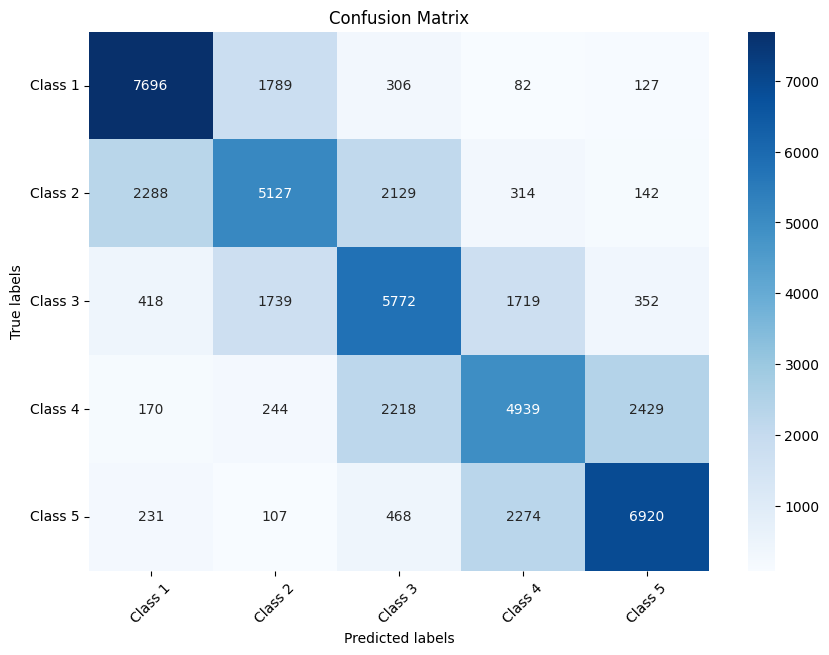

In [ ]:
# Assuming cf_matrix is already defined, replace this line with your actual confusion matrix
cf_matrix = np.array([
    [7696, 1789,  306,   82,  127],
    [2288, 5127, 2129,  314,  142],
    [ 418, 1739, 5772, 1719,  352],
    [ 170,  244, 2218, 4939, 2429],
    [ 231,  107,  468, 2274, 6920]
])

# Define class names
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)
plt.show()

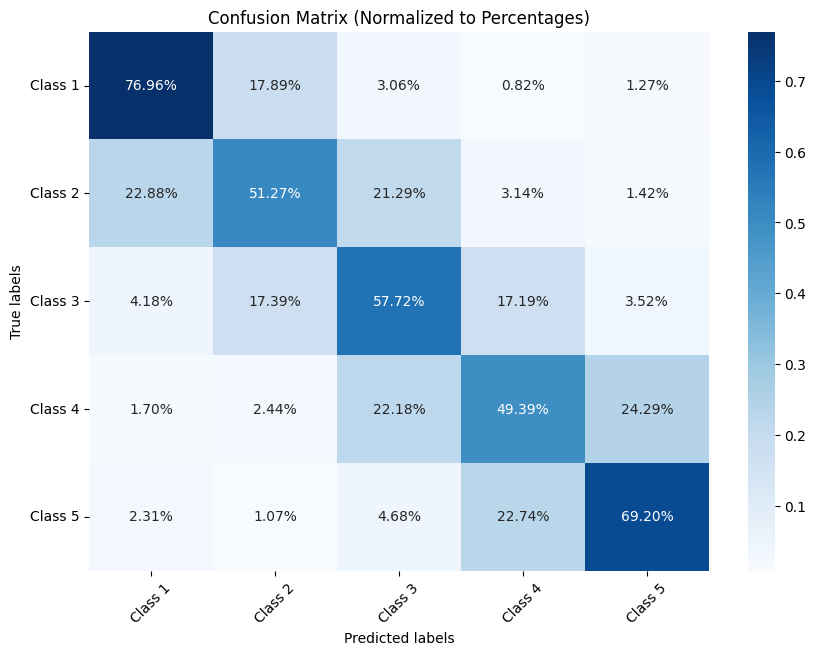

In [ ]:
# Assuming cf_matrix is already defined, replace this line with your actual confusion matrix
cf_matrix = np.array([
    [7696, 1789,  306,   82,  127],
    [2288, 5127, 2129,  314,  142],
    [ 418, 1739, 5772, 1719,  352],
    [ 170,  244, 2218, 4939, 2429],
    [ 231,  107,  468, 2274, 6920]
])

# Normalize the confusion matrix by rows (true labels)
row_sums = cf_matrix.sum(axis=1)[:, np.newaxis]
cf_matrix_normalized = cf_matrix / row_sums

# Define class names
class_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Create a heatmap with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Normalized to Percentages)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
print(classification_report(Y_test.argmax(axis=1),prediction_classes))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10000
           1       0.57      0.51      0.54     10000
           2       0.53      0.58      0.55     10000
           3       0.53      0.49      0.51     10000
           4       0.69      0.69      0.69     10000

    accuracy                           0.61     50000
   macro avg       0.61      0.61      0.61     50000
weighted avg       0.61      0.61      0.61     50000



Let's try it in action

In [ ]:
twt = ['']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  864 1320 1320]]
1/1 - 0s - 137ms/step
negative


In [ ]:
twt = ['Shame on me for choosing a pizza place based on its appearance in a book/movie. This place is a tourist trap not frequented by the locals. Long lines. Poor, slow and borderline hostile service. And while I am one who believes that all pizza is good pizza to some degree, the pizza here did not come remotely close to living up to expectations. The pizza was almost soupy and the flavor of the sauce/cheese was average at best. I should have listened to our Neapolitan charter boat captain and gone elsewhere. An opportunity missed and one that I will rue for a long time.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
# Determine the sentiment class based on the highest probability
if np.argmax(sentiment) == 0:
    print("Very Negative")
elif np.argmax(sentiment) == 1:
    print("Negative")
elif np.argmax(sentiment) == 2:
    print("Neutral")
elif np.argmax(sentiment) == 3:
    print("Positive")
elif np.argmax(sentiment) == 4:
    print("Very Positive")

[[ 119  510  395    9    7   83    3   83 1682   83 1652   27  296 1066
    83  234  125   86   98  400   47  493  877 1806 1433    7  119    5]]
1/1 - 0s - 81ms/step
Negative


In [ ]:
twt = ['Ate the pizza in the street, after one and a half hour wait. Worth it? Yes amazing pizza, love it.Wish the staff was happier to see me, but i get it. The Line was so long they had to go outside and tell people to comeback later.If you wanna go here I recommend booking, or come early.Any how, the best pizza I’ve ever eaten on the side of the street.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
# Determine the sentiment class based on the highest probability
if np.argmax(sentiment) == 0:
    print("Very Negative")
elif np.argmax(sentiment) == 1:
    print("Negative")
elif np.argmax(sentiment) == 2:
    print("Neutral")
elif np.argmax(sentiment) == 3:
    print("Positive")
elif np.argmax(sentiment) == 4:
    print("Very Positive")

[[  79  147  377  146   83   56  433   62   75    6  151  119   11  259
   218   28  278   11 1652  167   27  511   47   83   94  606  104  413]]
1/1 - 0s - 19ms/step
Very Positive


In [ ]:
twt = ['Mia is an extraordinary 10-year-old with a zest for life that inspires everyone around her. Her radiant smile and boundless energy light up every room she enters. Here are some of the many reasons Mia is truly amazing']
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
# Determine the sentiment class based on the highest probability
if np.argmax(sentiment) == 0:
    print("Very Negative")
elif np.argmax(sentiment) == 1:
    print("Negative")
elif np.argmax(sentiment) == 2:
    print("Neutral")
elif np.argmax(sentiment) == 3:
    print("Positive")
elif np.argmax(sentiment) == 4:
    print("Very Positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   176  109  171  522  276   77 1027  403  126   34 1652  114  859  146]]
1/1 - 0s - 18ms/step
Very Positive
